## Mounting Google Drive to get the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing Dataset

In [3]:
# Update this path with your actual file path in Google Drive
data_path = "/content/drive/MyDrive/Ostad - Dataset/DDS - Dataset.csv"
df = pd.read_csv(data_path)

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA (Exploratory Data Analysis)

Dataset Shape: (768, 9)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset Description:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.00000

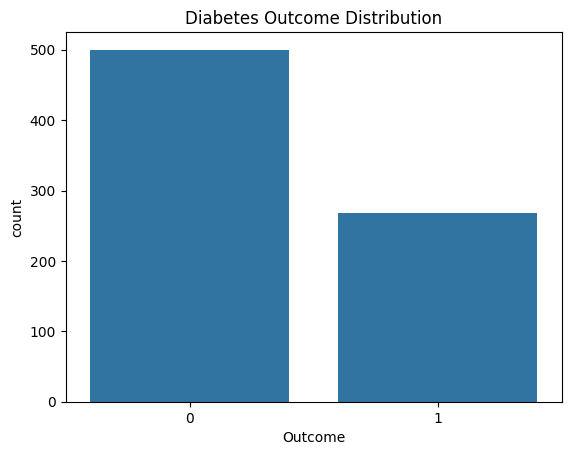

In [4]:
#Dataset Analysis

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Description:\n", df.describe())

# Visualize class distribution

sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

### Basic Statistics

In [5]:
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check Missing Values

In [6]:
print("\nMissing Values in Dataset:")
display(df.isnull().sum())


Missing Values in Dataset:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


### Correlation Heatmap

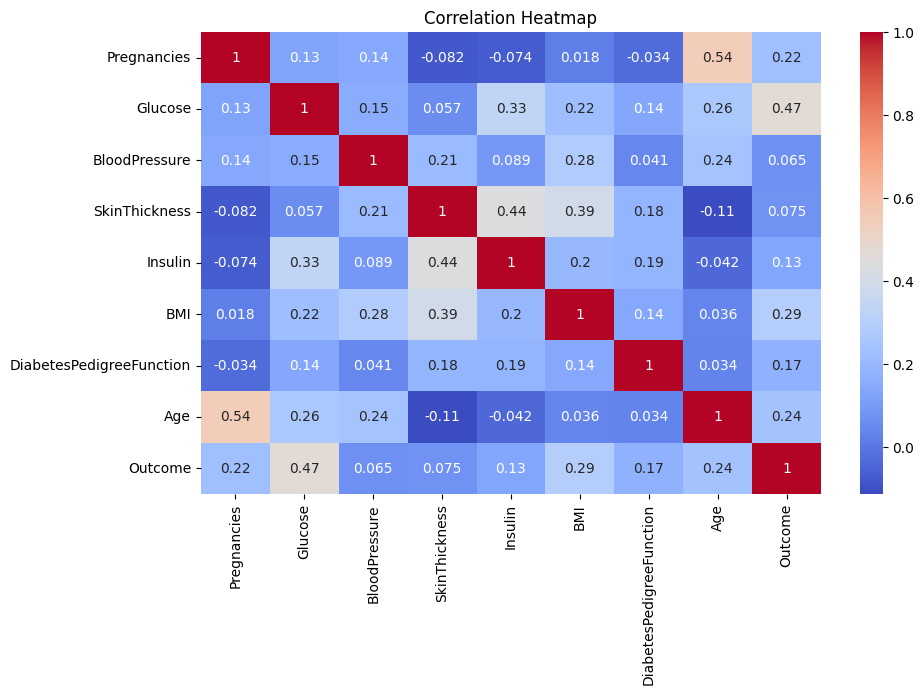

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Outcome Distribution

/tmp/ipython-input-545104440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='Set2')


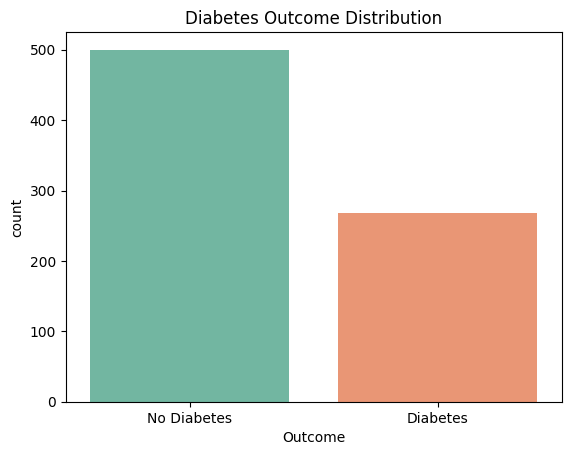

In [8]:
sns.countplot(data=df, x='Outcome', palette='Set2')
plt.title('Diabetes Outcome Distribution')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

### Pairplot for Selected Features

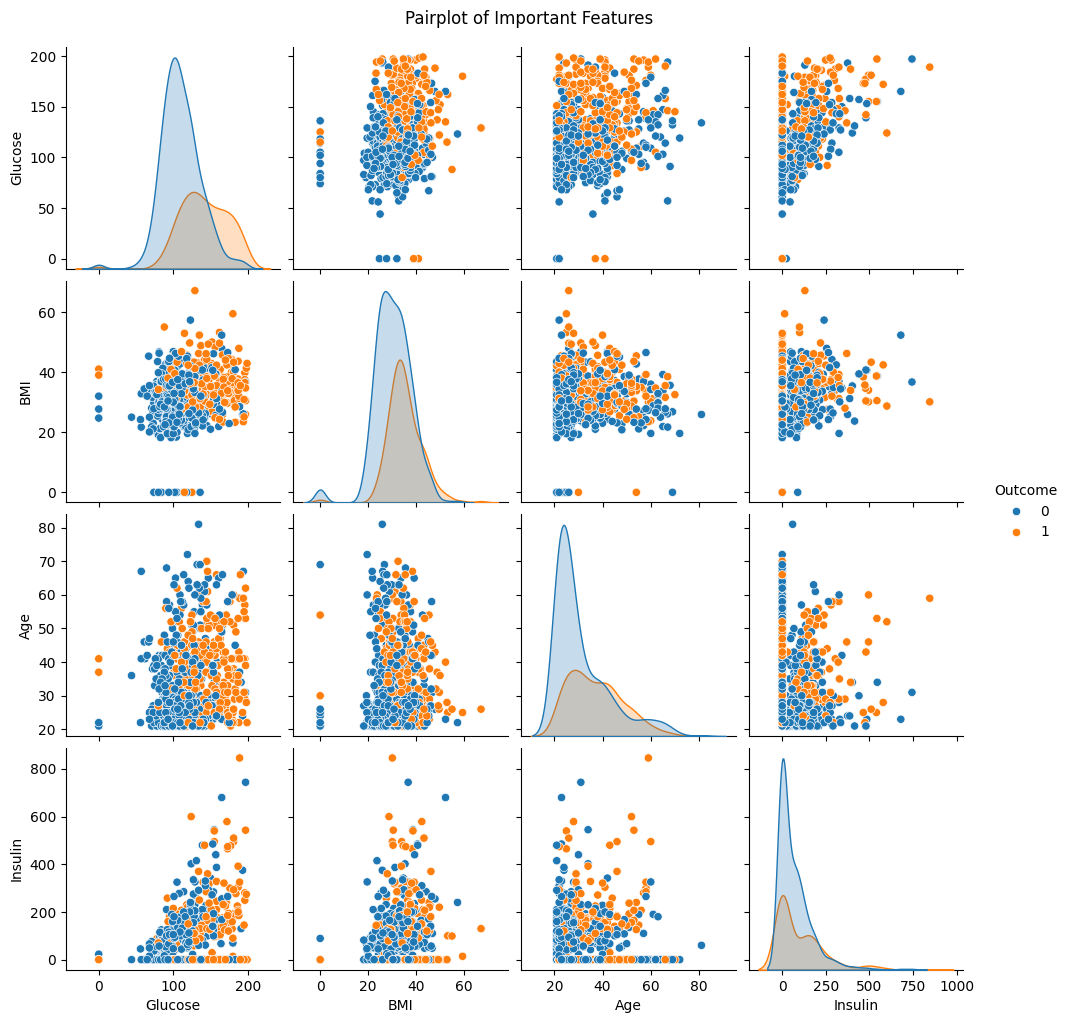

In [9]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome')
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()

### Boxplots to Compare Distributions

/tmp/ipython-input-3057492632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
/tmp/ipython-input-3057492632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
/tmp/ipython-input-3057492632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
/tmp/ipython-input-3057492632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

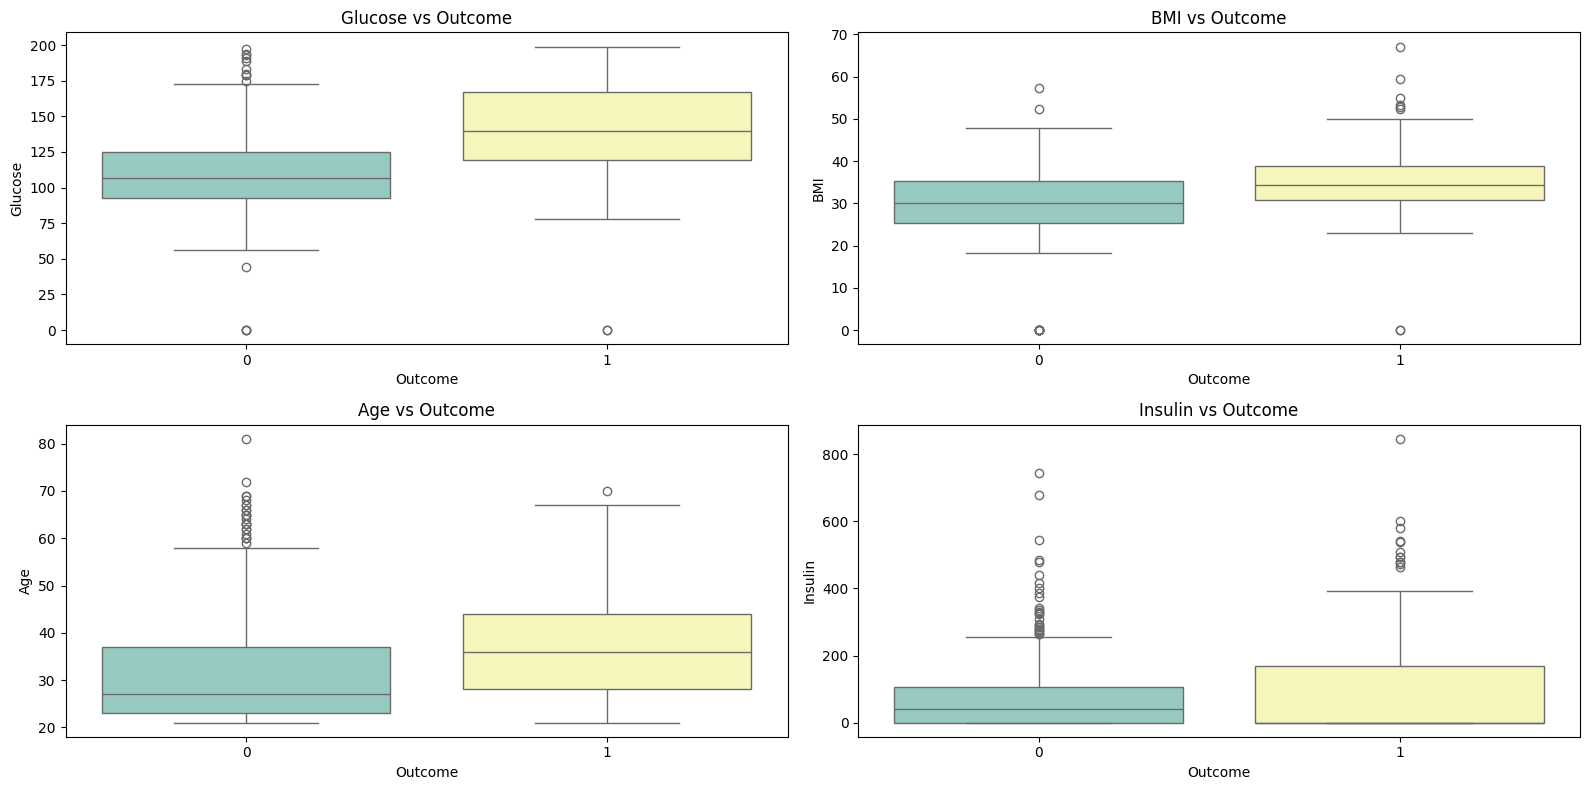

In [10]:
features_to_plot = ['Glucose', 'BMI', 'Age', 'Insulin']
plt.figure(figsize=(16,8))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()

## Feature Scaling & Data Preparation

In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Applying StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training

In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

## Feature Importance Visualization

/tmp/ipython-input-271110455.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dt_importances[dt_indices], y=feature_names[dt_indices], palette='coolwarm')


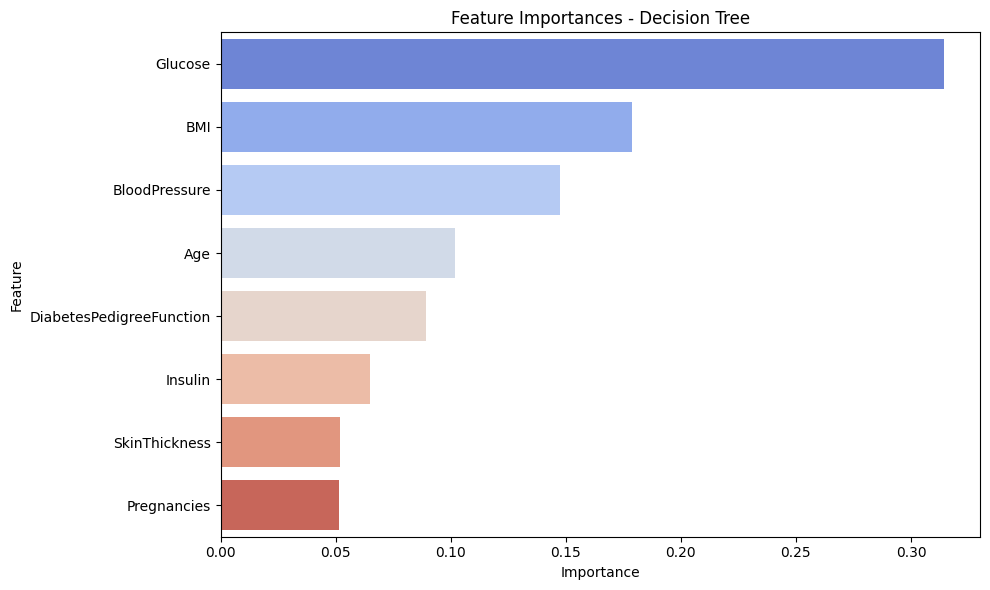

/tmp/ipython-input-271110455.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances[rf_indices], y=feature_names[rf_indices], palette='mako')


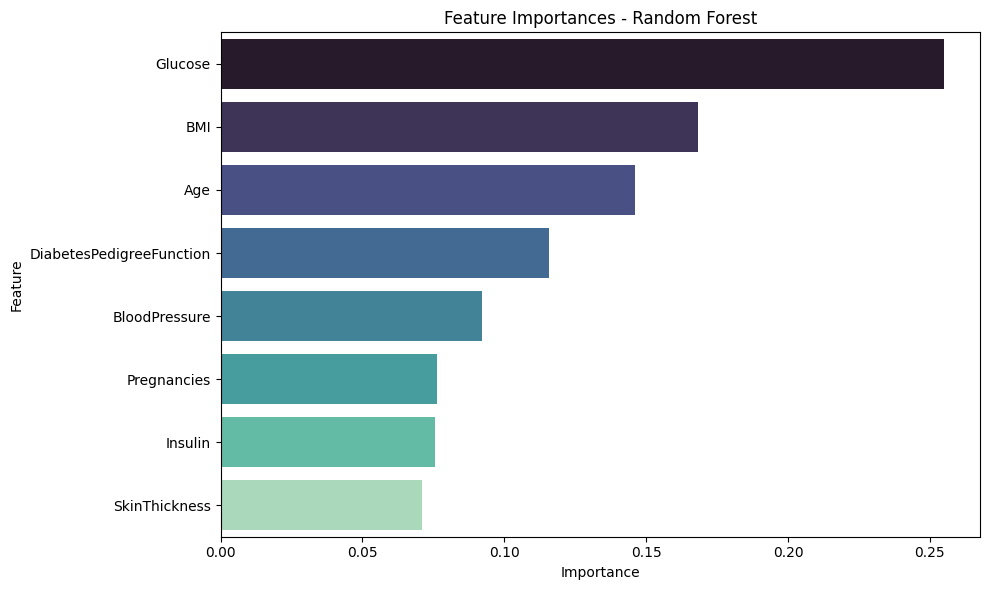

In [13]:
# Feature Importance Visualization (Decision Tree & Random Forest)

feature_names = X.columns

# Decision Tree
dt_model = trained_models["Decision Tree"]
dt_importances = dt_model.feature_importances_
dt_indices = np.argsort(dt_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=dt_importances[dt_indices], y=feature_names[dt_indices], palette='coolwarm')
plt.title('Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Random Forest
rf_model = trained_models["Random Forest"]
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[rf_indices], y=feature_names[rf_indices], palette='mako')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Model Evaluation

### Confusion Matrix

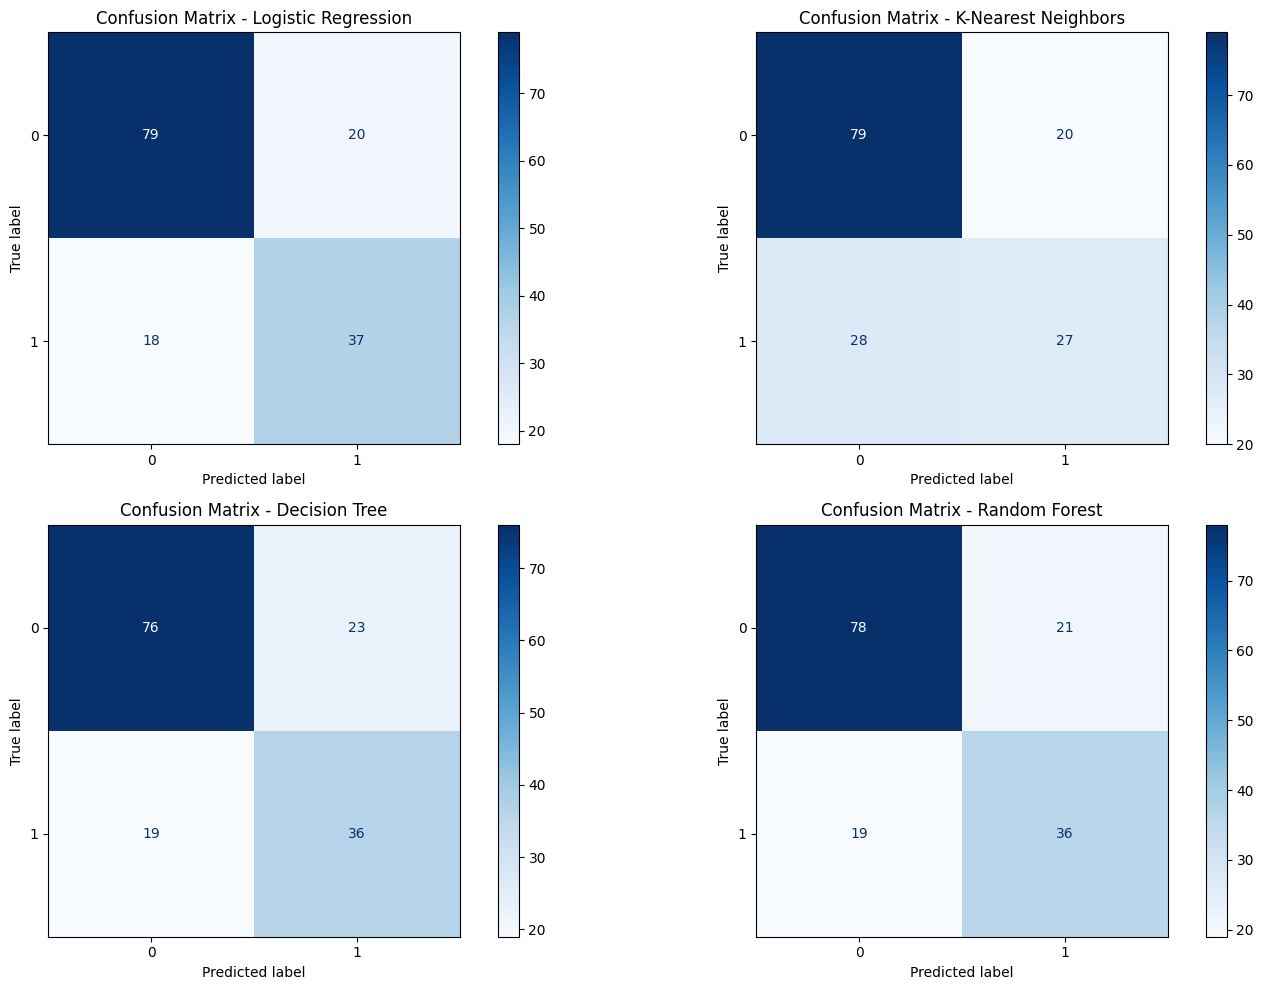

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 2, i+1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()

### Classification Reports

In [15]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    print(f" Classification Report for {name}")
    print(classification_report(y_test, y_pred))
    print("="*60)

 Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

 Classification Report for K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

 Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73    

### ROC Curves & AUC Scores

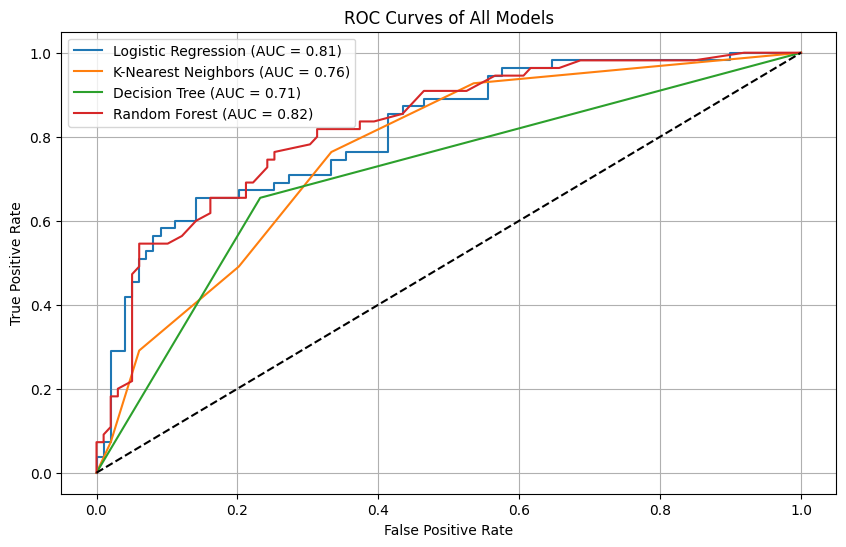


 AUC Scores Summary:
Logistic Regression: 0.8147
K-Nearest Neighbors: 0.7643
Decision Tree: 0.7111
Random Forest: 0.8246


In [16]:
plt.figure(figsize=(10, 6))
plt.title("ROC Curves of All Models")
auc_scores = {}

for name, model in trained_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    auc_scores[name] = auc

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Print AUC summary
print("\n AUC Scores Summary:")
for name, score in auc_scores.items():
    print(f"{name}: {score:.4f}")

### Accuracy Comparison of Each Models

In [17]:
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

print("Models Ranked by AUC Score:\n")
for rank, (name, score) in enumerate(sorted_auc, start=1):
    print(f"{rank}. {name} — AUC Score: {score:.4f}")

Models Ranked by AUC Score:

1. Random Forest — AUC Score: 0.8246
2. Logistic Regression — AUC Score: 0.8147
3. K-Nearest Neighbors — AUC Score: 0.7643
4. Decision Tree — AUC Score: 0.7111


Accuracy Comparison Table:


,Model,Accuracy
0,Logistic Regression,0.753247
3,Random Forest,0.740260
2,Decision Tree,0.727273
1,K-Nearest Neighbors,0.688312


/tmp/ipython-input-1395644802.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="viridis")


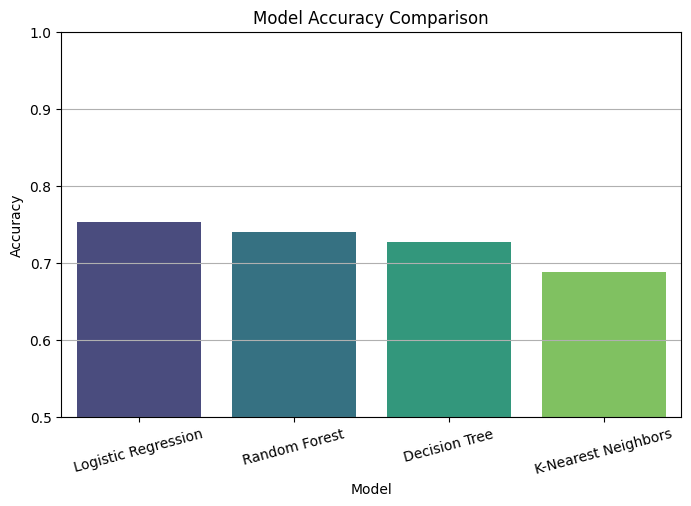

In [20]:
# Accuracy Comparison Table

from sklearn.metrics import accuracy_score

# Gather accuracy scores
accuracy_data = {
    "Model": [],
    "Accuracy": []
}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_data["Model"].append(name)
    accuracy_data["Accuracy"].append(acc)

# Convert to DataFrame
accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Show table
print("Accuracy Comparison Table:")
display(accuracy_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

## Model Prediction

In [23]:
# Example input: [Pregnancies, Glucose, BloodPressure, Skin Thickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
new_data = np.array([[2, 120, 70, 25, 85, 28.5, 0.45, 32]])  # Replace with your own values
new_data_scaled = scaler.transform(new_data)

# Picking Random Forest model to use for prediction
selected_model = trained_models["Random Forest"]  # You can change this to any model
prediction = selected_model.predict(new_data_scaled)[0]
probability = selected_model.predict_proba(new_data_scaled)[0][1]

print("Prediction:", "Diabetic" if prediction == 1 else "Non-Diabetic")
print("Probability of being diabetic:", f"{probability:.2f}")

Prediction: Non-Diabetic
Probability of being diabetic: 0.31


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


###  Final Model Performance Explanation

####  Logistic Regression
Logistic Regression performed reliably and generalized well on the test data. Its simplicity and ability to model linear relationships made it effective for this dataset. It is also less prone to overfitting compared to tree-based models.

####  Random Forest
Random Forest showed strong performance by capturing complex, non-linear feature interactions. As an ensemble of decision trees, it benefits from reduced variance and often produces more robust results. However, it may slightly overfit if the dataset is not large enough.

####  Decision Tree
The Decision Tree model was easy to interpret but less stable compared to Random Forest. It can capture non-linear patterns, but as a single tree, it's more susceptible to overfitting and doesn’t generalize as well.

####  K-Nearest Neighbors (KNN)
KNN struggled with this dataset, likely due to sensitivity to feature scaling and high dimensionality. While simple, it doesn't perform as well when the data lacks clear clustering or has overlapping class distributions.

---

###  Conclusion:

- **Logistic Regression** offers a balance between performance and simplicity.
- **Random Forest** is powerful for capturing complex patterns and is ideal when model robustness is important.
- **Decision Tree** is useful for interpretability but may need pruning or ensemble methods to improve.
- **KNN** is less suited for this type of medical data and can underperform due to its algorithmic limitations.

- **Best Overall Model (Accuracy):** Logistic Regression
- **Best Model (Probability-based performance):** Random Forest (AUC)
- **Most Interpretable Model:** Decision Tree
- **Least Performing Model:** KNN

For a real-world deployment scenario, **Logistic Regression** or **Random Forest** would be the most suitable choices depending on the need for explainability vs. predictive power.
